In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

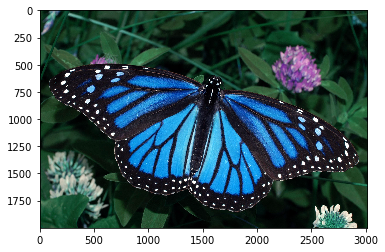

In [2]:
image = cv2.imread('monarch.jpg')
plt.imshow(image)

In [4]:
pixel_vals = image.reshape((-1, 3))
pixel_vals.shape

(6016000, 3)

In [5]:
pixel_vals = np.float32(pixel_vals)

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, 
                                     criteria, 10, 
                                     cv2.KMEANS_RANDOM_CENTERS)

In [7]:
centers = np.uint8(centers)

segmented_data = centers[labels.flatten()]
segmented_data.shape

(6016000, 3)

In [8]:
# original image dim
segmented_image = segmented_data.reshape((image.shape))
segmented_image.shape

(2000, 3008, 3)

In [9]:
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

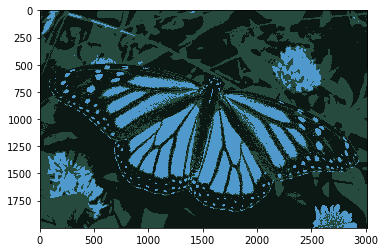

In [10]:
plt.imshow(segmented_image)

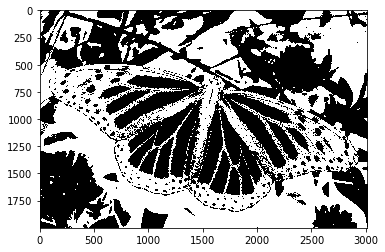

In [11]:
plt.imshow(labels_reshape==0, cmap='gray')

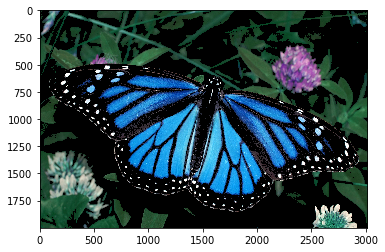

In [13]:


# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 0]

plt.imshow(masked_image)

